# Installation work

## Install necessary packages

In [ ]:
!pip install pandas
!pip install numpy
!pip install tabulate
!pip install prettytable
#!pip install bertopic
#!pip install Top2Vec
#!pip install top2vec[sentence_encoders]
!pip install tensorflow tensorflow_hub tensorflow_text
!pip install gensim
!pip install PyDrive
!pip install sklearn
!pip install scipy

## Import necessary packages

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats

In [ ]:
drive.mount('Drive', force_remount=True)

Mounted at Drive


## CSR Keywords

In [ ]:
# Define a list of words related to CSR => created by GPT
csr_words_en =  ['csr', 'corporate social responsibility', 'culture', 'industry', 'corporation', 'environment', 'countries', 'labor', 'organizations', 'ethics', 
                 'social factors', 'business', 'communication', 'supply chain', 'consumers', 'stakeholders', 'management', 'economic', 'theories', 'sustainability', 
                 'drivers barriers', 'human rights', 'policy, strategic', 'values', 'institutional', 'activism', 'social responsibility', 'ethical',  'responsible', 
                 'corporate citizenship', 'diversity', 'inclusion', 'climate change', 'green energy', 'fair trade', 'human rights', 'stakeholder engagement', 
                 'sustainable development', 'transparency', 'employee engagement', 'employee wellbeing', 'employee satisfaction', 'workplace safety', 'child labor', 
                 'human trafficking', 'living wage', 'volunteerism', 'donations', 'philanthropy', 'community involvement', 'economic growth', 'job creation', 
                 'waste reduction', 'water conservation', 'energy efficiency', 'renewable energy', 'carbon footprint', 'sustainable agriculture', 'renewable materials', 
                 'biodiversity', 'recycling', 'sustainable packaging', 'green products', 'clean technology', 'social impact', 'sustainable tourism', 'local sourcing', 
                 'circular economy', 'ethical sourcing', 'inclusive business', 'gender equality', 'social innovation', 'climate action']


csr_words_nl = ['maatschappelijk verantwoord ondernemen', 'mvo', 'cultuur', 'industrie', 'onderneming', 'milieu', 'landen', 'arbeid', 'organisaties', 'ethiek', 
                'sociale factoren', 'zaken', 'communicatie', 'toeleveringsketen', 'consumenten', 'belanghebbenden', 'beheer', 'economisch', 'theorieën', 
                'duurzaamheid', 'drijfveren belemmeringen', 'mensenrechten', 'beleid' , 'strategisch', 'waarden', 'institutioneel', 'activisme', 'duurzaamheid', 
                'maatschappelijke verantwoordelijkheid', 'ethisch', 'verantwoordelijk', 'bedrijfsburgerschap', 'diversiteit', 'inclusie', 'klimaatverandering', 
                'groene energie', 'eerlijke handel', 'mensenrechten', 'belanghebbendenbetrokkenheid', 'duurzame ontwikkeling', 'transparantie', 'medewerkersbetrokkenheid', 
                'welzijn medewerkers', 'tevredenheid medewerkers', 'veiligheid werkvloer', 'mensenhandel', 'kinderarbeid', 'leefbaar loon', 'leefbaar', 'vrijwilligerswerk', 
                'donaties', 'filantropie', 'betrokkenheid gemeenschap', 'economische groei', 'creatie werkgelegenheid', 'afvalvermindering', 'waterbesparing', 
                'energie efficiëntie', 'energire', 'efficiëntie', 'hernieuwbare energie', 'carbon footprint', 'duurzame landbouw', 'hernieuwbare materialen', 
                'biodiversiteit', 'recycling', 'duurzame verpakking', 'groene producten', 'schone technologie', 'sociale impact',    'duurzaam toerisme', 'lokale inkoop', 
                'circulaire economie', 'ethische inkoop', 'inclusief ondernemen', 'gendergelijkheid', 'sociale innovatie', 'klimaatactie']

csr_words_fr = ['rse', 'responsabilité sociétale entreprises', 'culture', 'industrie', 'société', 'environnement', 'pays', 'travail', 'organisations', 
                 'éthique', 'facteurs sociaux', 'entreprise', 'communication', 'chaîne approvisionnement', 'consommateurs', 
                 'parties prenantes', 'gestion', 'économique', 'théories', 'durabilité', 'motivations obstacles', 'droits humains', 
                 'politique, stratégie', 'valeurs', 'institutionnel', 'activisme','durabilité', 'responsabilité sociale', 'responsable', 'citoyenneté entreprise',
                 'diversité', 'inclusion', 'changement climatique', 'énergie verte', 'commerce équitable', 'droits homme', 'droits'
                 'engagement parties prenantes', 'développement durable', 'transparence', 'engagement employés', 'bien être employés',
                 'satisfaction employés', 'sécurité travail', 'traite êtres humains', 'travail enfants', 'salaire décent', 'volontariat', 'dons', 'philanthropie',
                 'implication communautaire', 'croissance économique', 'création emplois', 'réduction déchets', 'conservation eau', 'efficacité énergétique',
                 'énergie renouvelable', 'empreinte carbone', 'agriculture durable', 'matériaux renouvelables', 'biodiversité', 'recyclage', 'emballage durable',
                 'produits verts', 'technologie propre', 'impact social', 'tourisme durable', 'approvisionnement local', 'économie circulaire', 'approvisionnement éthique',
                 'entreprise inclusive', 'égalité sexes', 'innovation sociale', 'action climatique']

csr_words_du =  ['unternehmerische soziale verantwortung', 'kultur', 'industrie', 'unternehmen', 'umwelt', 'länder', 'arbeit', 'organisationen', 'ethik',
                'soziale faktoren', 'geschäft', 'kommunikation', 'lieferkette', 'verbraucher', 'interessenvertreter', 'management', 'ökonomie', 'theorien', 'nachhaltigkeit',
                'treiber hindernisse', 'menschenrechte', 'politik, strategisch', 'werte', 'institutionell', 'aktivismus', 'gesellschaftliche verantwortung', 'ethisch', 'verantwortlich',
                'unternehmensbürgerschaft', 'vielfalt', 'inklusion', 'klimawandel', 'grüne energie', 'fairer handel', 'menschenrechte', 'interessenvertretung',
                'nachhaltige entwicklung', 'transparenz', 'mitarbeiter-engagement', 'mitarbeiterwohlbefinden', 'mitarbeiterzufriedenheit', 'arbeitssicherheit', 'kinderarbeit',
                'menschenschmuggel', 'existenzsichernder lohn', 'freiwilligenarbeit', 'spenden', 'philanthropie', 'gemeinschaftliches engagement', 'wirtschaftswachstum', 'arbeitsplatzschaffung',
                'abfallreduzierung', 'wassereinsparung', 'energieeffizienz', 'erneuerbare energie', 'co2-fußabdruck', 'nachhaltige landwirtschaft', 'erneuerbare materialien',
                'biodiversität', 'recycling', 'nachhaltige verpackung', 'grüne produkte', 'saubere technologie', 'gesellschaftlicher einfluss', 'nachhaltiger tourismus', 'lokale beschaffung',
                'kreislaufwirtschaft', 'ethische beschaffung', 'inklusives geschäft', 'geschlechtergleichheit', 'soziale innovation', 'klimaschutz']

csr_words = csr_words_en + csr_words_nl + csr_words_fr + csr_words_du

# Import data

In [ ]:
#import data of the 5 size proportional samples 
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte proportional sample 1.json', 'r') as jsonfile:
  data_gp_1 = jsonfile.read()
datajson_gp_1 = json.loads(data_gp_1)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte proportional sample 2.json', 'r') as jsonfile:
  data_gp_2 = jsonfile.read()
datajson_gp_2 = json.loads(data_gp_2)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte proportional sample 3.json', 'r') as jsonfile:
  data_gp_3 = jsonfile.read()
datajson_gp_3 = json.loads(data_gp_3)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte proportional sample 4.json', 'r') as jsonfile:
  data_gp_4 = jsonfile.read()
datajson_gp_4 = json.loads(data_gp_4)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte proportional sample 5.json', 'r') as jsonfile:
  data_gp_5 = jsonfile.read()
datajson_gp_5 = json.loads(data_gp_5)

#import data of the 5 sector proporational samples 
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector proportional sample 1.json', 'r') as jsonfile:
  data_sp_1 = jsonfile.read()
datajson_sp_1 = json.loads(data_sp_1)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector proportional sample 2.json', 'r') as jsonfile:
  data_sp_2 = jsonfile.read()
datajson_sp_2 = json.loads(data_sp_2)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector proportional sample 3.json', 'r') as jsonfile:
  data_sp_3 = jsonfile.read()
datajson_sp_3 = json.loads(data_sp_3)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector proportional sample 4.json', 'r') as jsonfile:
  data_sp_4 = jsonfile.read()
datajson_sp_4 = json.loads(data_sp_4)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector proportional sample 5.json', 'r') as jsonfile:
  data_sp_5 = jsonfile.read()
datajson_sp_5 = json.loads(data_sp_5)

#import data of the 5 size equal samples 
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte equal sample 1.json', 'r') as jsonfile:
  data_ge_1 = jsonfile.read()
datajson_ge_1 = json.loads(data_ge_1)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte equal sample 2.json', 'r') as jsonfile:
  data_ge_2 = jsonfile.read()
datajson_ge_2 = json.loads(data_ge_2)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte equal sample 3.json', 'r') as jsonfile:
  data_ge_3 = jsonfile.read()
datajson_ge_3 = json.loads(data_ge_3)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte equal sample 4.json', 'r') as jsonfile:
  data_ge_4 = jsonfile.read()
datajson_ge_4 = json.loads(data_ge_4)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples grootte bedrijf/Grootte equal sample 5.json', 'r') as jsonfile:
  data_ge_5 = jsonfile.read()
datajson_ge_5 = json.loads(data_ge_5)

#import data of the 5 sector equal samples 
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector equal sample 1.json', 'r') as jsonfile:
  data_se_1 = jsonfile.read()
datajson_se_1 = json.loads(data_se_1)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector equal sample 2.json', 'r') as jsonfile:
  data_se_2 = jsonfile.read()
datajson_se_2 = json.loads(data_se_2)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector equal sample 3.json', 'r') as jsonfile:
  data_se_3 = jsonfile.read()
datajson_se_3 = json.loads(data_se_3)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector equal sample 4.json', 'r') as jsonfile:
  data_se_4 = jsonfile.read()
datajson_se_4 = json.loads(data_se_4)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Belgie vergelijkende studie nieuw/Samples sector bedrijf/Sector equal sample 5.json', 'r') as jsonfile:
  data_se_5 = jsonfile.read()
datajson_se_5 = json.loads(data_se_5)

# Pre-processing analysis

## Abstraction functions

In [ ]:
def get_processing_stats(files_amount, granularity):
  if granularity not in ["Words", "Characters"]:
    print("Granularity should be either \"Words\" or \"Characters\"")
    return
  results = {}
  overall_startcount = 0
  overall_stopwordscount = 0
  overall_cookiewordscount = 0
  overall_otherwordscount = 0
  overall_datescount = 0
  overall_punctuationscount = 0
  overall_numberscount = 0
  overall_nonexistingwordscount = 0

  for i in range(1,files_amount+1):
    for j in [f"datajson_sp_{i}", f"datajson_gp_{i}"]:
      #print(j)
      var_value = globals()[j]
      startcount = 0
      stopwordscount = 0
      cookiewordscount = 0
      otherwordscount = 0
      datescount = 0
      punctuationscount = 0
      numberscount = 0
      nonexistingwordscount = 0

      for company in var_value:
        startcount += var_value[company]["Processing"]["Start"][granularity]
        stopwordscount += var_value[company]["Processing"]["Stopwords"][granularity]
        cookiewordscount += var_value[company]["Processing"]["Cookiewords"][granularity]
        otherwordscount += var_value[company]["Processing"]["Other words"][granularity]
        datescount += var_value[company]["Processing"]["Dates"][granularity]
        punctuationscount += var_value[company]["Processing"]["Punctuations"][granularity]
        numberscount += var_value[company]["Processing"]["Numbers"][granularity]
        nonexistingwordscount += var_value[company]["Processing"]["Non existing words"][granularity]

      startavg = round(startcount/len(var_value))
      overall_startcount += startavg
      stopwordsavg = round(stopwordscount/len(var_value))
      overall_stopwordscount += stopwordsavg
      cookiewordscountavg = round(cookiewordscount/len(var_value))
      overall_cookiewordscount + cookiewordscountavg
      otherwordscountavg = round(otherwordscount/len(var_value))
      overall_otherwordscount += otherwordscountavg
      datescountavg = round(datescount/len(var_value))
      overall_datescount += datescountavg
      punctuationscountavg = round(punctuationscount/len(var_value))
      overall_punctuationscount += punctuationscountavg
      numberscountavg = round(numberscount/len(var_value))
      overall_numberscount += numberscountavg
      nonexistingwordscountavg = round(nonexistingwordscount/len(var_value))
      overall_nonexistingwordscount += nonexistingwordscountavg
      results[j] = {"startavg": startavg, "stopwordsavg": stopwordsavg, "cookiewordscountavg": cookiewordscountavg, "otherwordscountavg": otherwordscountavg, 
                                "datescountavg": datescountavg, "punctuationscountavg": punctuationscountavg, "numberscountavg": numberscountavg, "nonexistingwordscountavg": nonexistingwordscountavg}
      #print(startavg, stopwordsavg, cookiewordscountavg, otherwordscountavg, datescountavg, punctuationscountavg, numberscountavg, nonexistingwordscountavg)
  return {"overall_startcountavg" : overall_startcount/len(results), 
          "overall_stopwordscountavg" : overall_stopwordscount/len(results),
          "overall_cookiewordscountavg" : overall_cookiewordscount/len(results),
          "overall_otherwordscountavg" : overall_otherwordscount/len(results), 
          "overall_datescountavg" : overall_datescount/len(results), 
          "overall_punctuationscountavg" : overall_punctuationscount/len(results),
          "overall_numberscountavg" : overall_numberscount/len(results),
          "overall_nonexistingwordscountavg" : overall_nonexistingwordscount/len(results)}

In [ ]:
def get_graph(stats, granularity):
  values = [stats["overall_startcountavg"]-stats["overall_punctuationscountavg"]-stats["overall_nonexistingwordscountavg"]-stats["overall_stopwordscountavg"]-stats["overall_datescountavg"]-stats["overall_otherwordscountavg"]-stats["overall_numberscountavg"]-stats["overall_cookiewordscountavg"],
            stats["overall_startcountavg"]-stats["overall_punctuationscountavg"]-stats["overall_nonexistingwordscountavg"]-stats["overall_stopwordscountavg"]-stats["overall_datescountavg"]-stats["overall_otherwordscountavg"]-stats["overall_numberscountavg"],
            stats["overall_startcountavg"]-stats["overall_punctuationscountavg"]-stats["overall_nonexistingwordscountavg"]-stats["overall_stopwordscountavg"]-stats["overall_datescountavg"]-stats["overall_otherwordscountavg"],
            stats["overall_startcountavg"]-stats["overall_punctuationscountavg"]-stats["overall_nonexistingwordscountavg"]-stats["overall_stopwordscountavg"]-stats["overall_datescountavg"],
            stats["overall_startcountavg"]-stats["overall_punctuationscountavg"]-stats["overall_nonexistingwordscountavg"]-stats["overall_stopwordscountavg"],
            stats["overall_startcountavg"]-stats["overall_punctuationscountavg"]-stats["overall_nonexistingwordscountavg"],
            stats["overall_startcountavg"]-stats["overall_punctuationscountavg"],
            stats["overall_startcountavg"]]
  plt.barh(["Cookies", "Numbers", "Other words", "Dates", "Stopwords", "Non existing words", "Punctuations", "Start"], values)
  plt.ylabel('Pre-processing step')
  #put numbers on X axis in right format
  current_values = plt.gca().get_xticks()
  plt.gca().set_xticklabels([int(x/1000) for x in current_values])
  if granularity == "Words":
    plt.xlim([0, 43000])
    plt.title("Pre-processing: Amount of words left after processing step")
    plt.xlabel('Number of words (in thousands)')
    #put percentages next to the bars
    for i, v in enumerate(values):
      value = str(int(v/stats["overall_startcountavg"]*100)) + " %"
      plt.text(v + 800, i-0.075, str(value), color='red', fontweight='bold')
    plt.savefig('/content/Drive/MyDrive/Thesis/Words processed', dpi=600, bbox_inches='tight')
  elif granularity == "Characters":
    plt.xlim([0, 230000])
    plt.title("Pre-processing: Amount of characters left after processing step")
    plt.xlabel('Number of characters (in thousands)')
    #put percentages next to the bars
    for i, v in enumerate(values):
      value = str(int(v/stats["overall_startcountavg"]*100)) + " %"
      plt.text(v + 4000, i-0.075, str(value), color='red', fontweight='bold')
    plt.savefig('/content/Drive/MyDrive/Thesis/Characters processed', dpi=600, bbox_inches='tight')
  plt.show
  plt.clf()

## Execution

In [ ]:
statswords = get_processing_stats(5, "Words")
statscharacters = get_processing_stats(5, "Characters")
get_graph(statswords, "Words")
get_graph(statscharacters, "Characters")

<ipython-input-6-176ca7a1ac04>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([int(x/1000) for x in current_values])


<Figure size 640x480 with 0 Axes>

# CSR analysis

## General functions

In [ ]:
# Function to check if list of scraped and cleaned websites contains CSR keywords. Returns the keywords found
def check_csr(documentlijst):
  found_csr_words = []
  for content_page in documentlijst:
    for csr_word in csr_words:
      if csr_word in content_page:
        if csr_word not in found_csr_words:
          found_csr_words.append(csr_word)
  return found_csr_words

## Samples equal to population? Proof that all proportional samples don't differ + CSR Benchmark

In [ ]:
import statistics

print("results on proportional size samples")
total_sum_comp = 0
total_csr_counts = []
max_csr_values = []
csr_amounts = []
sample_csr_counts_size = []
for i in range(1,6):
  var_value = globals()[f"datajson_gp_{i}"]
  sum_comp = 0
  csr_counts = []
  for company in var_value:
    amount = len(check_csr(var_value[company]["Data"]))
    sum_comp += amount
    csr_counts.append(amount)
  sample_csr_counts_size.append(csr_counts)
  total_sum_comp += sum_comp
  total_csr_counts += csr_counts
  max_csr_values.append(max(csr_counts))
  print(f"Results for datajson_gp_{i}:")
  print('total CSR words over sample ==> ' , sum_comp)
  print('average CSR words over sample ==> ', sum_comp/len(var_value))
  print('maximum CSR words of a company ==> ', max_csr_values[-1])
  print('median CSR words over the companies ==> ', statistics.median(csr_counts))
  print('standard deviation of CSR words ==> ', statistics.stdev(csr_counts))

print(f"!!!!!!!!!!!!!!!!!!!!")
print("Overall results size:")
print('total CSR words over all samples ==> ' , total_sum_comp)
print('average CSR words over all samples ==> ', total_sum_comp/len(total_csr_counts))
print('biggest maximum CSR words over all samples ==> ', max(max_csr_values))
print('median CSR words over all companies ==> ', statistics.median(total_csr_counts))
print('standard deviation of CSR words over all companies ==> ', statistics.stdev(total_csr_counts))

print("=====================================================================")

print("results on proportional sector samples")
total_sum_comp = 0
total_csr_counts = []
max_csr_values = []
sample_csr_counts_sector = []
for i in range(1,6):
  var_value = locals()[f"datajson_sp_{i}"]
  sum_comp = 0
  csr_counts = []
  for company in var_value:
    amount = len(check_csr(var_value[company]["Data"]))
    sum_comp += amount
    csr_counts.append(amount)
  sample_csr_counts_sector.append(csr_counts)
  total_sum_comp += sum_comp
  total_csr_counts += csr_counts
  max_csr_values.append(max(csr_counts))
  print(f"Results for datajson_sp_{i}:")
  print('total CSR words over sample ==> ' , sum_comp)
  print('average CSR words over sample ==> ', sum_comp/len(var_value))
  print('maximum CSR words of a company ==> ', max_csr_values[-1])
  print('median CSR words over the companies ==> ', statistics.median(csr_counts))
  print('standard deviation of CSR words ==> ', statistics.stdev(csr_counts))

print(f"!!!!!!!!!!!!!!!!!!!!")
print("Overall results sector:")
print('total CSR words over all samples ==> ' , total_sum_comp)
print('average CSR words over all samples ==> ', total_sum_comp/len(total_csr_counts))
print('biggest maximum CSR words over all samples ==> ', max(max_csr_values))
print('median CSR words over all companies ==> ', statistics.median(total_csr_counts))
print('standard deviation of CSR words over all companies ==> ', statistics.stdev(total_csr_counts))


results on proportional size samples
Results for datajson_gp_1:
total CSR words over sample ==>  1212
average CSR words over sample ==>  6.06
maximum CSR words of a company ==>  60
median CSR words over the companies ==>  3.0
standard deviation of CSR words ==>  8.698547213074747
Results for datajson_gp_2:
total CSR words over sample ==>  1207
average CSR words over sample ==>  6.065326633165829
maximum CSR words of a company ==>  43
median CSR words over the companies ==>  2
standard deviation of CSR words ==>  8.994428902474066
Results for datajson_gp_3:
total CSR words over sample ==>  1283
average CSR words over sample ==>  6.447236180904523
maximum CSR words of a company ==>  44
median CSR words over the companies ==>  3
standard deviation of CSR words ==>  8.54613031335386
Results for datajson_gp_4:
total CSR words over sample ==>  1039
average CSR words over sample ==>  5.195
maximum CSR words of a company ==>  47
median CSR words over the companies ==>  2.0
standard deviation o

In [ ]:
from scipy.stats import mannwhitneyu

for sizesample in sample_csr_counts_size:
  for sectorsample in sample_csr_counts_size:
    print(mannwhitneyu(sizesample, sectorsample, alternative='two-sided'))

MannwhitneyuResult(statistic=20000.0, pvalue=1.0)
MannwhitneyuResult(statistic=20507.5, pvalue=0.5906007630287182)
MannwhitneyuResult(statistic=19729.5, pvalue=0.8801984115399742)
MannwhitneyuResult(statistic=21997.5, pvalue=0.07589984606430669)
MannwhitneyuResult(statistic=20289.0, pvalue=0.7995638975084357)
MannwhitneyuResult(statistic=19292.5, pvalue=0.5906007630287182)
MannwhitneyuResult(statistic=19800.5, pvalue=1.0)
MannwhitneyuResult(statistic=19152.0, pvalue=0.563185562418868)
MannwhitneyuResult(statistic=21264.0, pvalue=0.22237334330264602)
MannwhitneyuResult(statistic=19616.5, pvalue=0.8021591961267447)
MannwhitneyuResult(statistic=20070.5, pvalue=0.8801984115399742)
MannwhitneyuResult(statistic=20449.0, pvalue=0.563185562418868)
MannwhitneyuResult(statistic=19800.5, pvalue=1.0)
MannwhitneyuResult(statistic=21857.5, pvalue=0.0797509031433563)
MannwhitneyuResult(statistic=20294.0, pvalue=0.7274916339199361)
MannwhitneyuResult(statistic=18002.5, pvalue=0.07589984606430669)
Mann

## BEL 20 analysis

### Abstraction functions

In [ ]:
# Search for the CSR words on each webpage + define a dictionary to keep track of how many words each company uses
def find_csr_words_bel20(datajson):
  company_words = {}
  for company in datajson:
    found_csr_words = []
    for content_page in datajson[company]:
      for csr_word in csr_words:
        if csr_word in content_page:
          if csr_word not in found_csr_words:
            found_csr_words.append(csr_word)
    company_words[company] = found_csr_words
    if found_csr_words:
      print(f"Company {company} is committed to CSR because they refer to {', '.join(found_csr_words)} on their website.")
    else:
      print(f"Company {company} is NOT committed to CSR because they do not use any of the keywords.")
  #print([len(company_words[i]) for i in company_words])
  #print(company_words.items())
  sorted_companies = sorted(company_words.items(), key=lambda x: len(x[1]), reverse=True)
  print("\n\nRanking of companies by number of CSR-related words on their website:")
  for i, (name, words) in enumerate(sorted_companies):
    print(f"{i+1}. {name}: {len(words)} words")
  return company_words

In [ ]:
def check_relation(smallerdatajson, largerdatajson):
  print("\nThe following statistic returns if the two collections of CSR words are different")
  return stats.mannwhitneyu([len(smallerdatajson[i]) for i in smallerdatajson], 
                            [len(largerdatajson[i]) for i in largerdatajson], 
                            alternative='less')

In [ ]:
import statistics

def mean_and_sd(datajson):
  amountCSR = []
  for company in datajson:
    found_csr_words = []
    for content_page in datajson[company]:
      for csr_word in csr_words:
        if csr_word in content_page:
          if csr_word not in found_csr_words:
            found_csr_words.append(csr_word)
    amountCSR.append(len(found_csr_words))
  return {"meanCSR" : sum(amountCSR)/len(amountCSR), "stdCSR" : statistics.stdev(amountCSR)}

### Import files and finding results
including

*   CSR words in bel20 on depth 0 and depth 1
*   Check if depth 0 and depth 1 are statically different
*   Check if Bel20 depth 1 has statistically more CSR words than the Belgian CSR benchmark
*   make a wordcloud of most words used



In [ ]:
#import depth 0 and depth 1 files
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Bel20/Bel20_FinalScrape_depth0.json', 'r') as jsonfile:
  data_bel20_depth0 = jsonfile.read()
datajson_bel20_depth0 = json.loads(data_bel20_depth0)
with open('/content/Drive/MyDrive/Thesis/Output_scraping/Bel20/Bel20_FinalScrape_depth_1.json', 'r') as jsonfile:
  data_bel20_depth1 = jsonfile.read()
datajson_bel20_depth1 = json.loads(data_bel20_depth1)

In [ ]:
CSR_bel20_depth0 = find_csr_words_bel20(datajson_bel20_depth0)
CSR_bel20_depth1 = find_csr_words_bel20(datajson_bel20_depth1)
print(check_relation(CSR_bel20_depth0, CSR_bel20_depth1))
CSR_bel20_depth1_stats = mean_and_sd(datajson_bel20_depth1)
print(CSR_bel20_depth1_stats)
print("\nProof that Bel20 has more CSR words on their website than our benchmark")
print(stats.mannwhitneyu(total_csr_counts, [len(CSR_bel20_depth1[i]) for i in CSR_bel20_depth1], alternative='less'))

Company Apam is committed to CSR because they refer to travail on their website.
Company Ageas is committed to CSR because they refer to business, sustainability, gestion on their website.
Company Gbl is committed to CSR because they refer to business, management, sustainability, transparency on their website.
Company KBC is committed to CSR because they refer to communication on their website.
Company Solvay is committed to CSR because they refer to labor, industrie, travail on their website.
Company Barco is committed to CSR because they refer to culture, industry, environment, labor, business, sustainability, ethical, diversity, rse on their website.
Company Cofinimmo is committed to CSR because they refer to management, sustainability, diversity, transparency, environnement on their website.
Company Argenx is committed to CSR because they refer to labor, management on their website.
Company UCB is committed to CSR because they refer to business, management, sustainability, ethical,

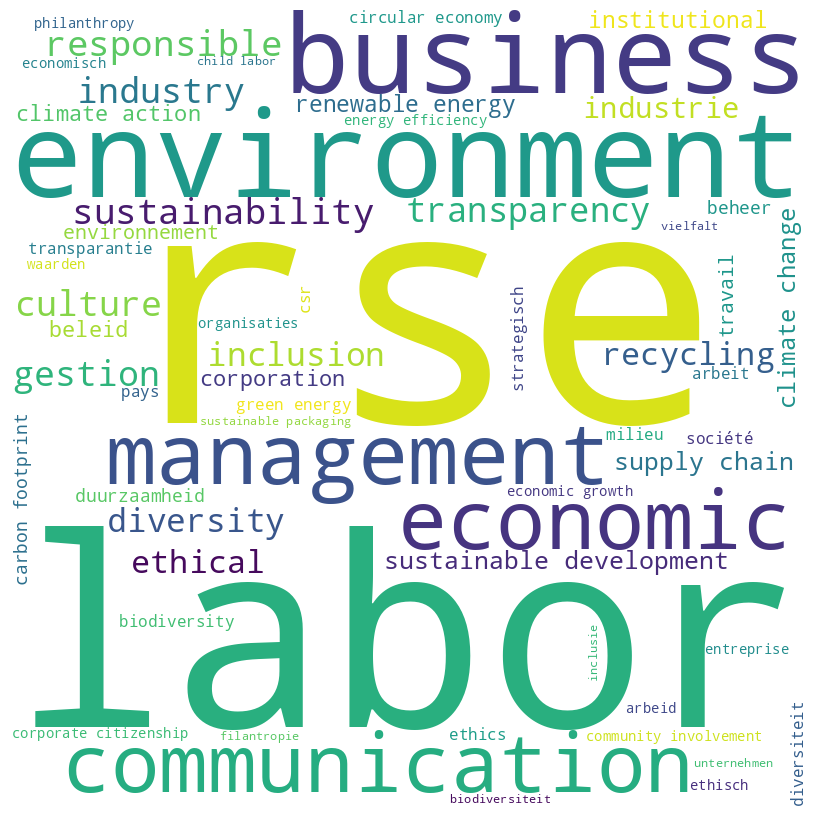

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Search for the CSR words on each webpage + define a dictionary to keep track of how many words each company uses
word_counts = {}
csr_word_counts = {}
for name_webpage in datajson_bel20_depth1:
    found_csr_words = []
    for content_page in datajson_bel20_depth1[name_webpage]:
        for csr_word in csr_words:
            if csr_word in content_page:
                if csr_word not in found_csr_words:
                    found_csr_words.append(csr_word)
                    # If the word appears on the page, add it to the company's count
                    if name_webpage in word_counts:
                        word_counts[name_webpage] += 1
                    else:
                        word_counts[name_webpage] = 1
                    # If the word appears on the page, add it to the csr_word_counts
                    if csr_word in csr_word_counts:
                        csr_word_counts[csr_word] += 1
                    else:
                        csr_word_counts[csr_word] = 1
            else:
                # If the word does not appear on the page, add 0 to the company's count
                if name_webpage not in word_counts:
                    word_counts[name_webpage] = 0
# Create a word cloud based on the frequency of each CSR word
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(csr_word_counts)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Depth 0 vs depth 1 in proportional samples --> TO DO

## Check relationship between number of words and number of CSR related words

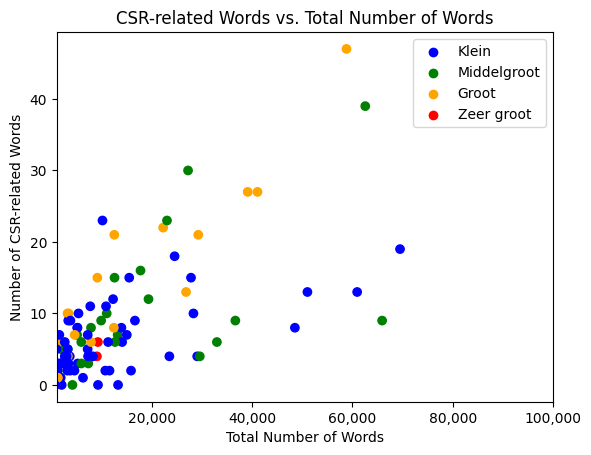

In [ ]:
import matplotlib.ticker as ticker

# Create a list of the total number of words for each website
total_words_list = [datajson_gp_4[company]["Processing"]["Start"]["Words"] for company in datajson_gp_4]
CSRwords = [len(check_csr(datajson_gp_4[company]["Data"])) for company in datajson_gp_4]

# Define a dictionary to map each "Size" value to a color
colors = {"Klein": "blue", "Middelgroot": "green", "Groot": "orange", "Zeer groot": "red"}

# Create a list of colors for each data point based on the value of the "Size" key
color_list = [colors[datajson_gp_4[company]["Size"]] for company in datajson_gp_4]
labels = list(colors.keys())

# Create a scatter plot of CSR-related words vs. total number of words
fig, ax = plt.subplots()
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ',')) # Format numbers with commas as thousands separators
ax.xaxis.set_major_formatter(formatter)
ax.scatter(total_words_list, CSRwords, c=color_list)
for color, label in zip(colors.values(), labels):
    ax.scatter([], [], c=color, label=label)
ax.set_title('CSR-related Words vs. Total Number of Words')
ax.set_xlabel('Total Number of Words')
ax.set_ylabel('Number of CSR-related Words')
ax.set_xlim([1000, 100000])
ax.legend()
#plt.savefig('/content/Drive/MyDrive/Thesis/images/CSR related words vs total number of Words - Sector - Size proportional sample 4', dpi=600, bbox_inches='tight')
plt.show()

## check all equal samples for differences

### statistical tests and clustering figures

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

def check_variable_influence(name_variable, sample_size):
  for i in range(1,6):
    for j in [f"datajson_se_{i}"]:
      print(f"exploring sample {i}")
      var_value = globals()[j]
      variable_values = []
      csr_words_result = {}
      for company in var_value:
        if var_value[company][name_variable] not in variable_values:
          variable_values.append(var_value[company][name_variable])
      variable_values_short = [i[0] for i in variable_values]
      for value in variable_values:
        csr_words_result[value] = []
      for company in var_value:
        for value in variable_values:
          if var_value[company][name_variable] == value:
            csr_words_result[value].append(len(check_csr(var_value[company]["Data"])))
      #append missing variables
      for value in variable_values:
        while len(csr_words_result[value]) != sample_size/len(variable_values):
          csr_words_result[value].append(sum(csr_words_result[value])/len(csr_words_result[value]))
        #print(f"Amount of occurences of value {value}:" + str(len(csr_words_result[value])))
      tests_results = []
      for k in variable_values:
        temp_test_results = []
        for l in variable_values:
          #if k != l and variable_values.index(k) < variable_values.index(l):
          result = stats.mannwhitneyu(csr_words_result[k], csr_words_result[l], alternative='two-sided')
          #if result[1] < 0.05:
            #print(f"Signicficant low p-value of value {variable_values_short[variable_values.index(k)]} compared to value {variable_values_short[variable_values.index(l)]}: " + str(result[1]))
          temp_test_results.append(result[1])
          #print(f"P-value of value {k} compared to value {l}: " + str(result[1]))
        tests_results.append(temp_test_results)
      print("\n")
      tests_results_array = np.array(tests_results)
      labels = variable_values
      labels = [i[0] for i in variable_values]
      print(tests_results_array)
      plt.figure(figsize=(10, 7))
      plt.title(f"Dendrogram sample {i}")  
      dend = shc.dendrogram(shc.linkage(tests_results_array, method='ward'), labels=labels)
      #plt.savefig(f'/content/Drive/MyDrive/Thesis/images/Dendrogram equal size sample {i}', dpi=600, bbox_inches='tight')
      plt.show
      #print("\n\n")

In [ ]:
#NOT USED

#print(tests_results_array)
# create a table with green cells where tests_results_array values < 0.05
fig, ax = plt.subplots()
ax.axis('off')
n_rows, n_cols = tests_results_array.shape
cell_colors = np.full((n_rows, n_cols), 'white')
for i in range(n_rows):
    for j in range(n_cols):
        if tests_results_array[i, j] < 0.05:
            cell_colors[i, j] = 'green'
        else:
            cell_colors[i, j] = 'white'
        if j < i:
          cell_colors[i, j] = 'gray' 
table = ax.table(cellText=None, loc='center', cellLoc='center', 
                cellColours=cell_colors, rowLabels = variable_values_short, colLabels=variable_values_short)

# adjust table cell size
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)

exploring sample 1


[[1.00000000e+00 1.67031573e-03 8.11101896e-02 1.83495022e-02
  3.32328422e-03 8.81304386e-02 4.55429415e-01 1.96060731e-01
  4.66317058e-01 1.06079072e-01 1.02873672e-03 8.94155143e-01
  3.00986148e-01 9.55609785e-03 1.47049552e-03 8.14427831e-03
  1.10766759e-02 4.02980100e-01 4.56243450e-01 2.56342072e-04]
 [1.67031573e-03 1.00000000e+00 3.43431095e-01 4.26659071e-01
  9.69781771e-01 1.84716936e-01 1.31312498e-02 2.54684967e-01
  8.67040157e-03 4.24907534e-01 2.56481367e-01 1.97266003e-03
  6.17271750e-02 4.71506639e-01 5.19737042e-01 4.72008558e-01
  8.79694432e-01 9.44108921e-03 1.09433357e-01 3.40863476e-01]
 [8.11101896e-02 3.43431095e-01 1.00000000e+00 4.03371131e-01
  3.05113948e-01 8.18091378e-01 1.84104402e-01 9.07695608e-01
  2.01456704e-01 7.28167761e-01 6.83837369e-02 4.77387824e-02
  5.84587673e-01 8.49434040e-01 5.30017554e-02 2.88463726e-01
  4.45731104e-01 4.63103618e-01 6.11558525e-01 7.31881236e-01]
 [1.83495022e-02 4.26659071e-01 4.03371131e-01

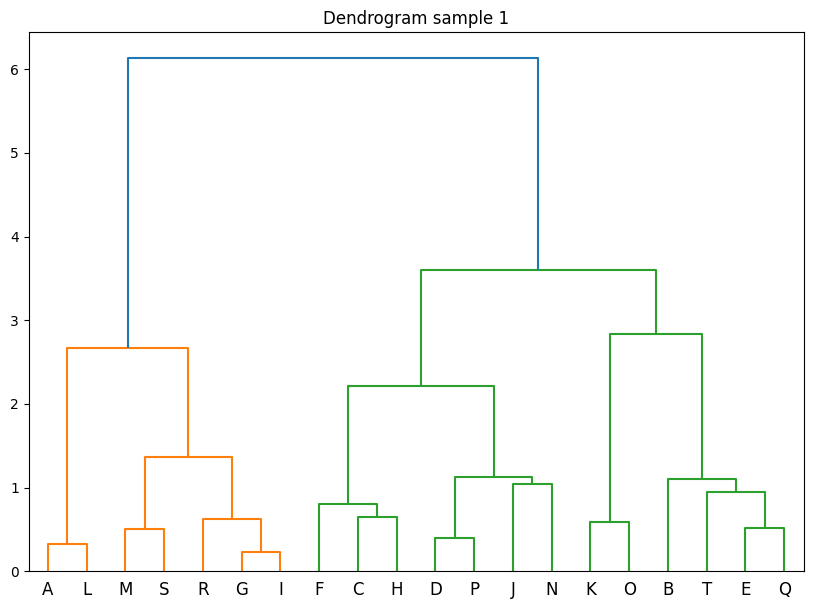

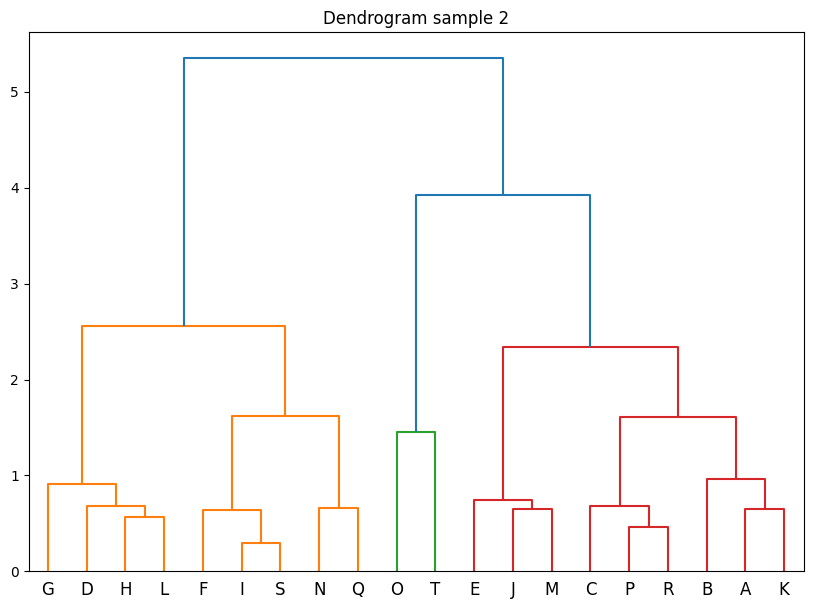

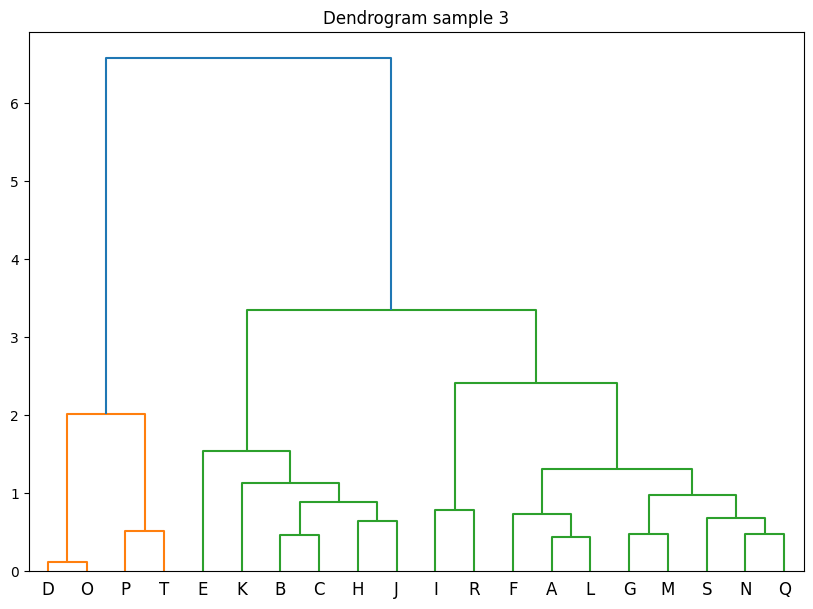

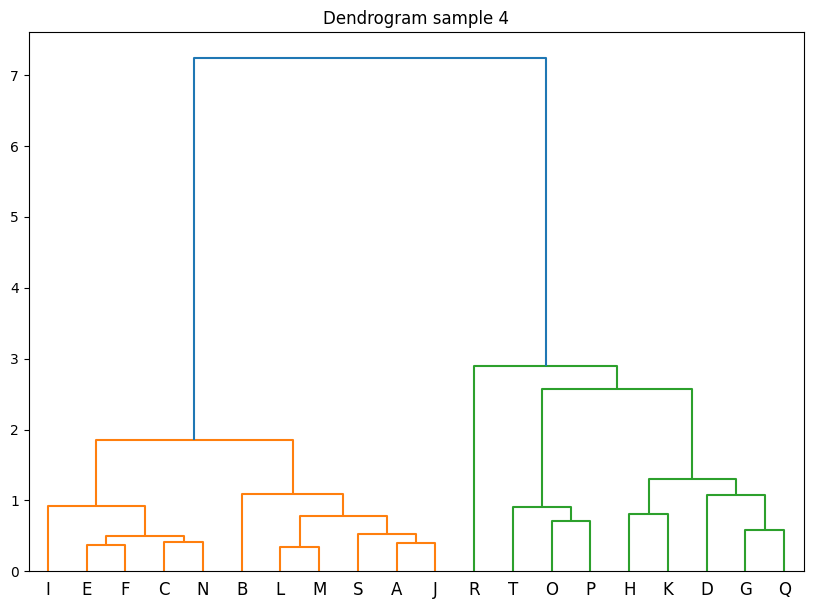

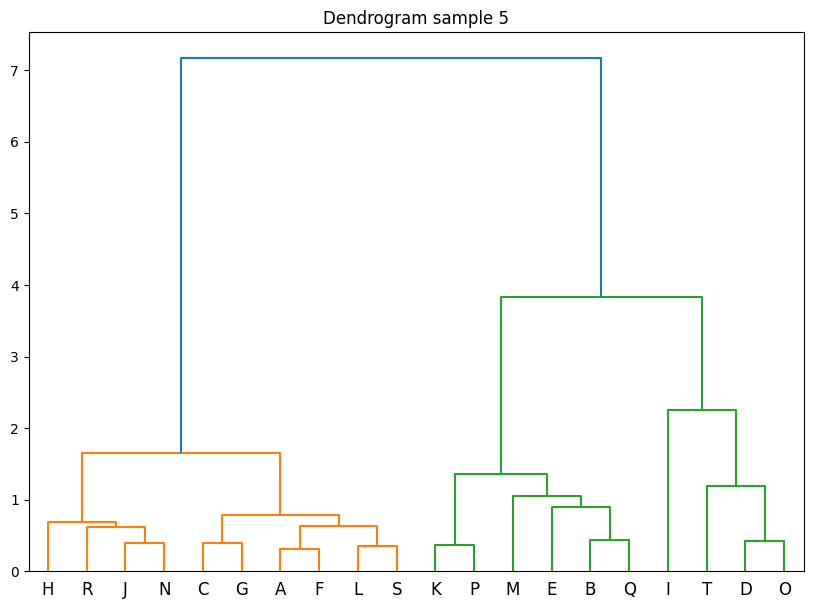

In [ ]:
check_variable_influence("Sector", 200)

### Average CSR-words figures

In [ ]:
import statistics

for i in range(1,6):
  for j in [f"datajson_ge_{i}"]:
    print(f"exploring sample {i}")
    var_value = globals()[j]
    variable_values = []
    csr_words_result = {}
    for company in var_value:
      if var_value[company]["Size"] not in variable_values:
        variable_values.append(var_value[company]["Size"])
    variable_values_short = [i[0] for i in variable_values]
    for value in variable_values:
      csr_words_result[value] = []
    for company in var_value:
      for value in variable_values:
        if var_value[company]["Size"] == value:
          csr_words_result[value].append(len(check_csr(var_value[company]["Data"])))
    print(csr_words_result)

avg_csr_word_counts = []
for sector in csr_words_result:
  avg_csr_word_counts.append(statistics.mean(csr_words_result[sector]))

print(avg_csr_word_counts)

exploring sample 1
{'Groot': [3, 0, 24, 0, 14, 3, 12, 15, 0, 22, 18, 0, 13, 0, 1, 18, 4, 26, 0, 0, 4, 6, 27, 19, 6, 1, 5, 2, 7, 2, 4, 17, 8, 0, 11, 0, 0, 31, 0, 40, 19, 13, 11, 0, 2, 28, 5, 15, 0, 0], 'Klein': [11, 30, 0, 0, 7, 10, 6, 0, 4, 0, 0, 7, 0, 2, 3, 2, 0, 0, 3, 8, 1, 11, 3, 2, 11, 0, 0, 0, 1, 0, 2, 11, 0, 0, 2, 4, 0, 0, 0, 0, 4, 3, 0, 3, 3, 6, 1, 0, 24, 0], 'Middelgroot': [9, 0, 23, 0, 0, 0, 12, 5, 0, 6, 0, 4, 22, 3, 4, 3, 10, 0, 16, 12, 25, 4, 6, 0, 9, 0, 24, 7, 2, 12, 10, 19, 12, 5, 35, 0, 5, 3, 3, 17, 12, 19, 4, 1, 5, 16, 3, 17, 0, 34], 'Zeer groot': [0, 1, 20, 10, 19, 15, 31, 20, 48, 30, 48, 20, 6, 15, 0, 1, 36, 0, 0, 19, 0, 0, 0, 0, 49, 2, 0, 0, 32, 2, 0, 24, 22, 10, 17, 5, 25, 0, 11, 14, 19, 26, 0, 26, 0, 15, 0, 41, 0, 44]}
exploring sample 2
{'Groot': [8, 2, 0, 0, 0, 20, 15, 16, 0, 17, 1, 0, 1, 8, 3, 36, 5, 5, 17, 4, 15, 7, 6, 2, 23, 11, 29, 0, 12, 24, 1, 0, 0, 0, 4, 5, 6, 15, 8, 10, 0, 17, 1, 12, 2, 2, 7, 4, 24, 1], 'Klein': [0, 3, 3, 3, 4, 22, 1, 8, 0, 8, 1, 0, 4, 0, 

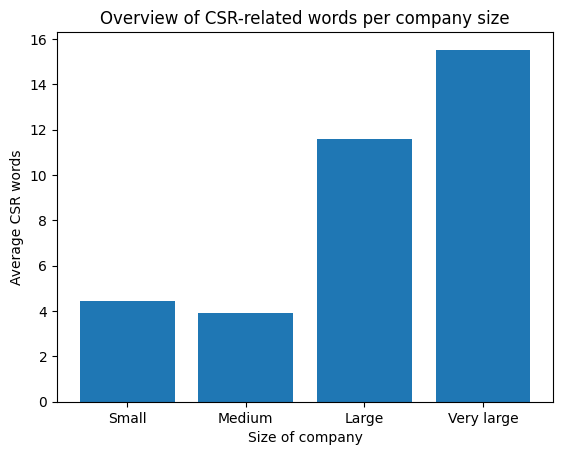

In [ ]:
#from textwrap import wrap

#variable_values_new = ['\n'.join(wrap(l, 12)) for l in variable_values]
avg_csr_word_counts[2], avg_csr_word_counts[0] = avg_csr_word_counts[0], avg_csr_word_counts[2]
variable_values[2], variable_values[0] = variable_values[0], variable_values[2]
avg_csr_word_counts[1], avg_csr_word_counts[0] = avg_csr_word_counts[0], avg_csr_word_counts[1]
variable_values[1], variable_values[0] = variable_values[0], variable_values[1]


plt.bar(["Small", "Medium", "Large", "Very large"], avg_csr_word_counts)
plt.xlabel("Size of company")
plt.ylabel("Average CSR words")
plt.title("Overview of CSR-related words per company size")
#plt.savefig('/content/Drive/MyDrive/Thesis/images/Overview of CSR-related words per company size', dpi=600, bbox_inches='tight')
plt.show()

### testing sectors on benchmark

In [ ]:
print(sum(total_csr_counts)/len(total_csr_counts))

6.749665327978581


In [ ]:
def check_with_benchmark(name_variable, sample_size):
  for i in range(1,6):
    for j in [f"datajson_se_{i}"]:
      print(f"exploring sample {i}")
      var_value = globals()[j]
      variable_values = []
      csr_words_result = {}
      for company in var_value:
        if var_value[company][name_variable] not in variable_values:
          variable_values.append(var_value[company][name_variable])
      variable_values_short = [i[0] for i in variable_values]
      for value in variable_values:
        csr_words_result[value] = []
      for company in var_value:
        for value in variable_values:
          if var_value[company][name_variable] == value:
            csr_words_result[value].append(len(check_csr(var_value[company]["Data"])))
      #append missing variables
      for value in variable_values:
        while len(csr_words_result[value]) != sample_size/len(variable_values):
          csr_words_result[value].append(sum(csr_words_result[value])/len(csr_words_result[value]))
        #print(f"Amount of occurences of value {value}:" + str(len(csr_words_result[value])))
      tests_results = []
      for k in variable_values:
        result = stats.mannwhitneyu(csr_words_result[k], total_csr_counts, alternative='two-sided')
        if result[1] < 0.05:
          print(f"Signicficant low p-value of value {variable_values_short[variable_values.index(k)]}: " + str(result[1]))
        #else:
          #print(f"p-value of value {k}:" + str(result[1]))
        tests_results.append(result[1])
      print("\n")

In [ ]:
check_with_benchmark("Sector", 200)

exploring sample 1
Signicficant low p-value of value A: 0.04023442113821563
Signicficant low p-value of value B: 0.010204512481207573
Signicficant low p-value of value E: 0.015276042714796741
Signicficant low p-value of value K: 0.0005270570453796287
Signicficant low p-value of value L: 0.026986689038380755
Signicficant low p-value of value O: 0.0015748823694042694
Signicficant low p-value of value T: 0.0034008854596814984


exploring sample 2
Signicficant low p-value of value O: 0.0028131567344081166
Signicficant low p-value of value T: 0.0034008854596814984


exploring sample 3
Signicficant low p-value of value D: 0.0006826957644287261
Signicficant low p-value of value O: 0.0010126430789377644
Signicficant low p-value of value P: 0.010095868624521834
Signicficant low p-value of value T: 0.014744276947314786


exploring sample 4
Signicficant low p-value of value G: 0.045296237319028855
Signicficant low p-value of value O: 0.011818730462914444
Signicficant low p-value of value P: 0.017